In [2]:
#Part B

import spacy
import pandas as pd

In [20]:
#Load and extract relevant data

path = "D:\\Users\\Paola\\Documents\\University\\Master\\NLP\\Assignment_1\\NLP_Assignment_1\\intro2nlp_assignment1_code\\data\\original\\english\\WikiNews_Train.tsv"
cnames = ["ID ", "Sentence", "Start", "Offset", "Target", "Native", "Non-Native", "Diff_Native", "Diff_Non-Native", "Binary", "Probabilistic"]
data = pd.read_csv(path, encoding='utf-8', sep="\t", names=cnames)
print(data)

                                 ID   \
0     3QREJ3J433YH30CYS49AQ6MZ3G0LKZ   
1     3QREJ3J433YH30CYS49AQ6MZ3G0LKZ   
2     3QREJ3J433YH30CYS49AQ6MZ3G0LKZ   
3     3QREJ3J433YH30CYS49AQ6MZ3G0LKZ   
4     3QREJ3J433YH30CYS49AQ6MZ3G0LKZ   
...                              ...   
7741  344M16OZKIG450N98VEM53DJOE4ENA   
7742  344M16OZKIG450N98VEM53DJOE4ENA   
7743  344M16OZKIG450N98VEM53DJOE4ENA   
7744  344M16OZKIG450N98VEM53DJOE4ENA   
7745  344M16OZKIG450N98VEM53DJOE4ENA   

                                               Sentence  Start  Offset  \
0     #37-1 Guatemalan Supreme Court approves impeac...      6      16   
1     #37-1 Guatemalan Supreme Court approves impeac...     31      39   
2     #37-1 Guatemalan Supreme Court approves impeac...     17      24   
3     #37-1 Guatemalan Supreme Court approves impeac...     25      30   
4     #37-1 Guatemalan Supreme Court approves impeac...     31      51   
...                                                 ...    ...     ...   
7

In [4]:
# Number of instances labeled with 0 and 1
print(data.Binary.value_counts()) #4530 times 0 and 3216 times 1

0    4530
1    3216
Name: Binary, dtype: int64


In [5]:
#Statistics of probabilistic label

print("Mean:", data.Probabilistic.mean())
print("Std:", data.Probabilistic.std())
print("Median:", data.Probabilistic.median())
print("Min:", data.Probabilistic.min())
print("Max:", data.Probabilistic.max())


Mean: 0.08394655305964374
Std: 0.16967909326094677
Median: 0.0
Min: 0.0
Max: 1.0


In [21]:
import re

prefix_re = re.compile(r'''^[[("']''')
suffix_re = re.compile(r'''[])"']$''')
infix_re = re.compile(r'''[.,?:;...‘’`“”"'~]''')

def custom_tokenizer(nlp):
    return spacy.tokenizer.Tokenizer(nlp.vocab, prefix_search=prefix_re.search,
                                suffix_search=suffix_re.search,
                                infix_finditer=infix_re.finditer,
                                token_match=None)

In [22]:
#Analysis of tokens per instance

nlp = spacy.load('en_core_web_sm')
nlp.tokenizer = custom_tokenizer(nlp)
data.insert(loc=5, column="Parsed_Target", value=data.Target.apply(nlp)) #Need to change so that punctionation isn't included, also there are hyphenated words which are being split up
data.insert(loc=6, column="N_Token", value=data.Parsed_Target.apply(len))
print(data)

                                 ID   \
0     3QREJ3J433YH30CYS49AQ6MZ3G0LKZ   
1     3QREJ3J433YH30CYS49AQ6MZ3G0LKZ   
2     3QREJ3J433YH30CYS49AQ6MZ3G0LKZ   
3     3QREJ3J433YH30CYS49AQ6MZ3G0LKZ   
4     3QREJ3J433YH30CYS49AQ6MZ3G0LKZ   
...                              ...   
7741  344M16OZKIG450N98VEM53DJOE4ENA   
7742  344M16OZKIG450N98VEM53DJOE4ENA   
7743  344M16OZKIG450N98VEM53DJOE4ENA   
7744  344M16OZKIG450N98VEM53DJOE4ENA   
7745  344M16OZKIG450N98VEM53DJOE4ENA   

                                               Sentence  Start  Offset  \
0     #37-1 Guatemalan Supreme Court approves impeac...      6      16   
1     #37-1 Guatemalan Supreme Court approves impeac...     31      39   
2     #37-1 Guatemalan Supreme Court approves impeac...     17      24   
3     #37-1 Guatemalan Supreme Court approves impeac...     25      30   
4     #37-1 Guatemalan Supreme Court approves impeac...     31      51   
...                                                 ...    ...     ...   
7

In [26]:
print("Instances with more than 1 token:", data["N_Token"][data["N_Token"]>1].count())
print("Maximum number of tokens per instance:", data.N_Token.max())
data.loc[data['N_Token'] == 5]

Instances with more than 1 token: 1013
Maximum number of tokens per instance: 9


,ID,Sentence,Start,Offset,Target,Parsed_Target,N_Token,Native,Non-Native,Diff_Native,Diff_Non-Native,Binary,Probabilistic
922,32W3UF2EZOM3MUTPUZTVG67GCLWC4K,#35-27 The report is known to contain some mat...,11,37,report is known to contain,"(report, is, known, to, contain)",5,10,10,0,0,0,0.00
1681,3MVY4USGB6OD1IH0CALZPCLH36JISZ,#16-3 In a ceremony described by the press as ...,240,266,a lion of American history,"(a, lion, of, American, history)",5,10,10,1,0,1,0.05
2768,3E24UO25QZRIA6U63SV184LBXQL6OW,"#13-3 ""We're working with legislative leaders ...",384,414,growing the size of government,"(growing, the, size, of, government)",5,10,10,1,0,1,0.05
3441,38Z7YZ2SB331O22NK6WUUC6GLIYIQA,#10-1 Polish PM Beata Szydło welcomes US troop...,48,82,Polish Prime Minister Beata Szydło,"(Polish, Prime, Minister, Beata, Szydło)",5,10,10,0,0,0,0.00
3503,3U74KRR67MM6UJ56YQ3H4PDKROQTNE,"#37-9 The Social and Popular Assembly, formed ...",6,37,The Social and Popular Assembly,"(The, Social, and, Popular, Assembly)",5,10,10,0,0,0,0.00
3808,3ACRLU860NF24RYC559DE8DP7PQEBL,#23-1 U.S. presidential candidate Mark Everson...,161,190,Internal Revenue Service (IRS,"(Internal, Revenue, Service, (, IRS)",5,10,10,1,0,1,0.05
4275,32CAVSKPCEQIGPD6T8VTCEMJ71T1U6,#23-2 Everson argues his exclusion violates Ti...,160,194,advance one candidate over another,"(advance, one, candidate, over, another)",5,10,10,0,0,0,0.00
4329,32CAVSKPCEQIGPD6T8VTCEMJ71T1U6,#23-5 He announced his candidacy this past Mar...,167,202,reinstatement of the military draft,"(reinstatement, of, the, military, draft)",5,10,10,1,1,1,0.10
4570,3LG268AV387PKYF112V3ENITPBTERY,#42-47 We mixed different concentrations of RO...,65,95,plated them out on petridishes,"(plated, them, out, on, petridishes)",5,10,10,0,0,0,0.00
5283,3D1TUISJWI1TGV941FGZ4D35O34IUF,"#22-2 Yesterday, former Indian president APJ A...",203,242,Indian Institute of Management Shillong,"(Indian, Institute, of, Management, Shillong)",5,10,10,2,0,1,0.10


In [32]:
#TASK 8

#Add information about total of annotatators marking a word as complex
data["TotalAnnotations"] = data["Diff_Native"] + data["Diff_Non-Native"]

#Slice the data!
pizza = data.query("N_Token==1 and TotalAnnotations >=1").__deepcopy__()
#print(pizza)

#Calculate the length of the tokens as the number of characters. 
pizza["TokenLengths"] = pizza.Parsed_Target.apply(lambda x: [len(y) for y in x][0])
#print(pizza)

#Calculate the frequency of the tokens using the wordfreq package 
from wordfreq import word_frequency

pizza["TokenFreqs"] = pizza.Parsed_Target.apply(lambda x: [word_frequency(str(y), "en") for y in x][0])
print(pizza)

                                 ID   \
0     3QREJ3J433YH30CYS49AQ6MZ3G0LKZ   
1     3QREJ3J433YH30CYS49AQ6MZ3G0LKZ   
5     3QREJ3J433YH30CYS49AQ6MZ3G0LKZ   
12    3QREJ3J433YH30CYS49AQ6MZ3G0LKZ   
16    3QREJ3J433YH30CYS49AQ6MZ3G0LKZ   
...                              ...   
7734  344M16OZKIG450N98VEM53DJOE4ENA   
7735  344M16OZKIG450N98VEM53DJOE4ENA   
7737  344M16OZKIG450N98VEM53DJOE4ENA   
7738  344M16OZKIG450N98VEM53DJOE4ENA   
7744  344M16OZKIG450N98VEM53DJOE4ENA   

                                               Sentence  Start  Offset  \
0     #37-1 Guatemalan Supreme Court approves impeac...      6      16   
1     #37-1 Guatemalan Supreme Court approves impeac...     31      39   
5     #37-1 Guatemalan Supreme Court approves impeac...     40      51   
12    #37-1 Guatemalan Supreme Court approves impeac...    127     135   
16    #37-1 Guatemalan Supreme Court approves impeac...    157     164   
...                                                 ...    ...     ...   
7

Calculate the frequency of the tokens using the wordfreq package 
(https://pypi.org/project/wordfreq/).

Correlation between frequency and probabilistic label:
                TokenFreqs  Probabilistic
TokenFreqs       1.000000      -0.298921
Probabilistic   -0.298921       1.000000

Correlation between length and probabilistic label:
                TokenLengths  Probabilistic
TokenLengths       1.000000       0.281753
Probabilistic      0.281753       1.000000


<AxesSubplot:title={'center':'Scatterplot for POS Label and Complexity'}, xlabel='POS Label', ylabel='Complexity'>

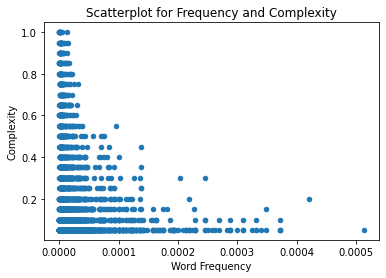

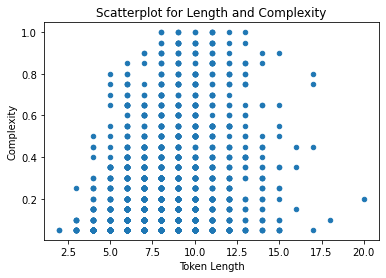

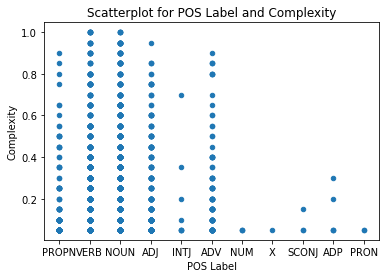

In [33]:
#Pearson Correlations
corr1 = pizza[["TokenFreqs","Probabilistic"]].corr(method="pearson")
print("Correlation between frequency and probabilistic label:\n", corr1)

corr2 = pizza[["TokenLengths","Probabilistic"]].corr(method="pearson")
print("\nCorrelation between length and probabilistic label:\n", corr2)

#Add POS tags
pizza["POS"] = pizza.Parsed_Target.apply(lambda x: [y.pos_ for y in x][0])
#print(pizza)

#Scatterplot x=frequency, y=complexity
pizza.plot(x="TokenFreqs", y="Probabilistic", kind="scatter",title="Scatterplot for Frequency and Complexity", xlabel="Word Frequency", ylabel="Complexity")

#Scatterplot x=length, y=complexity
pizza.plot(x="TokenLengths", y="Probabilistic", kind="scatter",title="Scatterplot for Length and Complexity", xlabel="Token Length", ylabel="Complexity")

#Scatterplot x=POS, y=complexity
pizza.plot(x="POS", y="Probabilistic", kind="scatter",title="Scatterplot for POS Label and Complexity", xlabel="POS Label", ylabel="Complexity")